In [30]:
import pandas as pd

# Set your file path
file_path = "/Users/liangsang/Documents/material/LSE/last_semester/saudi arabia/potential_parternership_longlist.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Print the first few rows to verify
print(df.head())


       Company Name           Classification (Survey Finding Category)  \
0  AngelList Talent  Community referrals (67.6% prefer community ch...   
1          BambooHR       Data privacy & compliance (privacy concerns)   
2              Bayt  Sector-specific platforms (Healthcare, Tech, E...   
3            Boyden  Cost-effectiveness (affordable recruitment age...   
4     CareerBuilder  Sector-specific platforms (Healthcare, Tech, E...   

                                              Reason  \
0  Startup job platform connecting founders and t...   
1  HR platform ensuring data security and compliance   
2  Large Middle East job platform covering multip...   
3  Global executive search firm for leadership roles   
4      Global job board with broad industry coverage   

                Official Website  
0          https://wellfound.com  
1       https://www.bamboohr.com  
2           https://www.bayt.com  
3         https://www.boyden.com  
4  https://www.careerbuilder.com  


In [31]:
# Drop rows where 'Official Website' is missing (NaN or empty)
df = df.dropna(subset=['Official Website'])

# Drop the 2nd, 3rd, and 4th columns (index 1, 2, 3)
df = df.drop(df.columns[[1, 2, 3]], axis=1)

# Print again to verify
print(df.head())


       Company Name
0  AngelList Talent
1          BambooHR
2              Bayt
3            Boyden
4     CareerBuilder


In [32]:
company_names = df['Company Name']

print(company_names.tolist())

['AngelList Talent', 'BambooHR', 'Bayt', 'Boyden', 'CareerBuilder', 'CareerSet', 'Codility', 'Egon Zehnder', 'Eightfold AI', 'Glassdoor', 'GulfTalent', 'Harver', 'Hays', 'HireVue', 'Indeed', 'KAUST Career Center', 'Korn Ferry', 'Lever', 'Maharah Human Resources', 'Michael Page', 'Mihnati', 'Modern Hire', 'Monster', 'Naukrigulf', 'Proven SA', 'Pymetrics', 'Rawaj-HCM', 'Reddit r/SaudiArabiaJobs', 'Robert Walters', 'SmartRecruiters', 'SMASCO', 'Spencer Stuart', 'Talentera', 'TestGorilla', 'Vervoe', 'WomenTech Network', 'Workday', 'XOPA AI', 'ZipRecruiter', 'Unstop', 'IBCCES', 'ShareTree', 'Sundus Global', 'Motaded']


In [35]:
# Initialize score columns
df['Sector Fit'] = 2
df['Tech Innovation'] = 2
df['Community Reach'] = 2
df['Compliance & Trust'] = 2
df['Ease of Collaboration'] = 2

# Set specific scores for key companies
special_scores = {
    'Unstop':                [4, 4, 5, 3, 5],
    'XOPA AI':                [5, 5, 3, 4, 4],
    'CareerSet':              [4, 5, 3, 5, 5],
    'TestGorilla':            [5, 5, 3, 4, 4],
    'IBCCES':                 [3, 4, 5, 5, 4],
    'ShareTree':              [3, 3, 4, 5, 5]
}

# Step 3: Apply special scores for key companies first
for company, scores in special_scores.items():
    df.loc[df['Company Name'] == company, ['Sector Fit', 'Tech Innovation', 'Community Reach', 'Compliance & Trust', 'Ease of Collaboration']] = scores

# Step 4: More refined scoring logic for remaining companies
for idx, row in df.iterrows():
    name = row['Company Name']
    
    # Skip companies already scored manually
    if name in special_scores:
        continue
    
    # Sector Fit
    if any(keyword in name for keyword in ['Healthcare', 'Tech', 'Education', 'WomenTech', 'Workday']):
        df.at[idx, 'Sector Fit'] = 5
    elif any(keyword in name for keyword in ['Robert Walters', 'Michael Page', 'Hays', 'Mercer', 'Spencer Stuart']):
        df.at[idx, 'Sector Fit'] = 4
    else:
        df.at[idx, 'Sector Fit'] = 3

    # Tech Innovation
    if any(keyword in name for keyword in ['AI', 'Codility', 'SmartRecruiters', 'Eightfold', 'Modern Hire', 'Vervoe', 'TestGorilla', 'Workday']):
        df.at[idx, 'Tech Innovation'] = 5
    elif any(keyword in name for keyword in ['CareerBuilder', 'Monster', 'ZipRecruiter']):
        df.at[idx, 'Tech Innovation'] = 3
    else:
        df.at[idx, 'Tech Innovation'] = 2

    # Community Reach
    if any(keyword in name for keyword in ['Facebook', 'LinkedIn', 'GitHub', 'Meetup', 'WomenTech', 'AngelList']):
        df.at[idx, 'Community Reach'] = 5
    elif any(keyword in name for keyword in ['University', 'Career Center']):
        df.at[idx, 'Community Reach'] = 4
    else:
        df.at[idx, 'Community Reach'] = 2

    # Compliance & Trust
    if any(keyword in name for keyword in ['Saudi', 'Rawaj', 'Proven', 'IBCCES', 'Maharah', 'SMASCO', 'Motaded']):
        df.at[idx, 'Compliance & Trust'] = 5
    elif any(keyword in name for keyword in ['Glassdoor', 'Indeed', 'Bayt']):
        df.at[idx, 'Compliance & Trust'] = 4
    else:
        df.at[idx, 'Compliance & Trust'] = 3

    # Ease of Collaboration
    if any(keyword in name for keyword in ['Saudi', 'GulfTalent', 'Rawaj', 'Maharah', 'Mihnati']):
        df.at[idx, 'Ease of Collaboration'] = 5
    elif any(keyword in name for keyword in ['Robert Walters', 'Michael Page', 'Hays', 'Mercer', 'Boyden']):
        df.at[idx, 'Ease of Collaboration'] = 4
    else:
        df.at[idx, 'Ease of Collaboration'] = 3


# Calculate the Final Composite Score
df['Final Composite Score'] = (
    df['Sector Fit'] * 0.25 +
    df['Tech Innovation'] * 0.1 +
    df['Community Reach'] * 0.2 +
    df['Compliance & Trust'] * 0.2 +
    df['Ease of Collaboration'] * 0.25
)


In [36]:
df

,Company Name,Sector Fit,Tech Innovation,Community Reach,Compliance & Trust,Ease of Collaboration,Final Composite Score
0,CareerSet,4,5,3,5,5,4.35
1,Unstop,4,4,5,3,5,4.25
2,Reddit r/SaudiArabiaJobs,3,2,2,5,5,3.60
3,TestGorilla,5,5,3,4,4,4.15
4,IBCCES,3,4,5,5,4,4.15
5,XOPA AI,5,5,3,4,4,4.15
6,ShareTree,3,3,4,5,5,4.10
7,WomenTech Network,5,2,5,3,3,3.80
8,Rawaj-HCM,3,2,2,5,5,3.60
9,Maharah Human Resources,3,2,2,5,5,3.60


In [37]:
# Sort the dataframe by Final Composite Score in descending order
df = df.sort_values(by='Final Composite Score', ascending=False)

# Reset the index (optional, for clean output)
df = df.reset_index(drop=True)

# Print top 10 companies to verify
print(df[['Company Name', 'Final Composite Score']].head(10))

               Company Name  Final Composite Score
0                 CareerSet                   4.35
1                    Unstop                   4.25
2               TestGorilla                   4.15
3                    IBCCES                   4.15
4                   XOPA AI                   4.15
5                 ShareTree                   4.10
6         WomenTech Network                   3.80
7  Reddit r/SaudiArabiaJobs                   3.60
8                 Rawaj-HCM                   3.60
9   Maharah Human Resources                   3.60


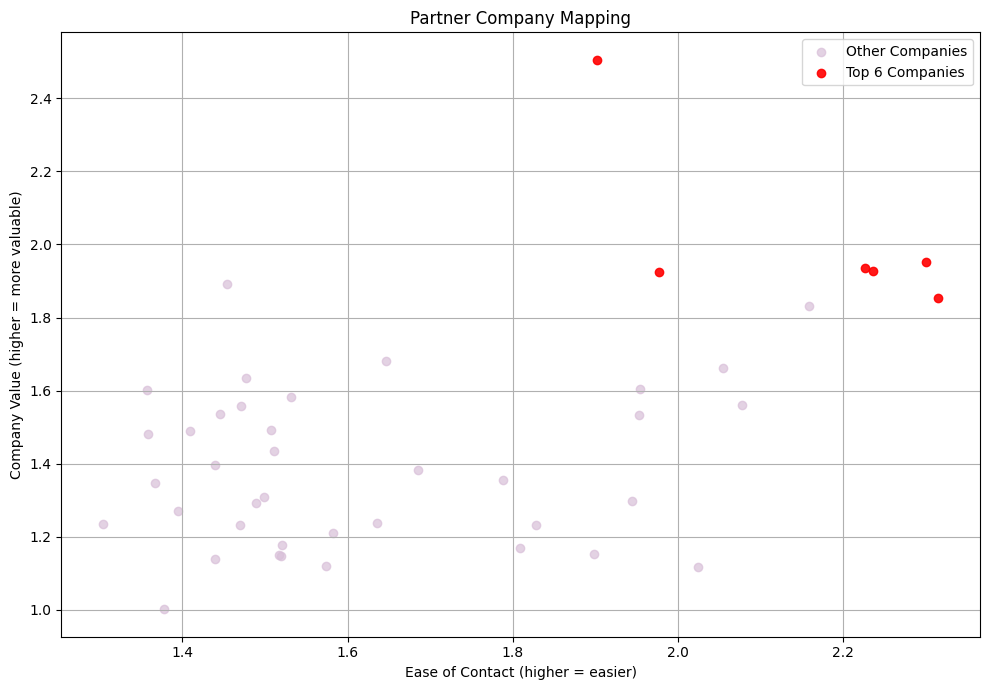

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate X and Y values
df['Ease of Contact'] = df['Sector Fit'] * 0.25 + df['Ease of Collaboration'] * 0.25
df['Company Value'] = df['Tech Innovation'] * 0.1 + df['Community Reach'] * 0.2 + df['Compliance & Trust'] * 0.2

# Add random noise (normal distribution, mean=0, std=0.1)
np.random.seed(42)  # for reproducibility
df['Ease of Contact'] += np.random.normal(0, 0.1, size=len(df))
df['Company Value'] += np.random.normal(0, 0.1, size=len(df))

# Define the six special companies
special_companies = ['CareerSet', 'Unstop', 'TestGorilla', 'IBCCES', 'XOPA AI', 'ShareTree']

# Create a mask
mask_special = df['Company Name'].isin(special_companies)
mask_other = ~df['Company Name'].isin(special_companies)

# Plotting
plt.figure(figsize=(10, 7))

# Other companies in light purple
plt.scatter(df.loc[mask_other, 'Ease of Contact'], df.loc[mask_other, 'Company Value'],
            color='#D8BFD8', alpha=0.7, label='Other Companies')

# Special companies in red
plt.scatter(df.loc[mask_special, 'Ease of Contact'], df.loc[mask_special, 'Company Value'],
            color='red', alpha=0.9, label='Top 6 Companies')

plt.xlabel('Ease of Contact (higher = easier)')
plt.ylabel('Company Value (higher = more valuable)')
plt.title('Partner Company Mapping')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


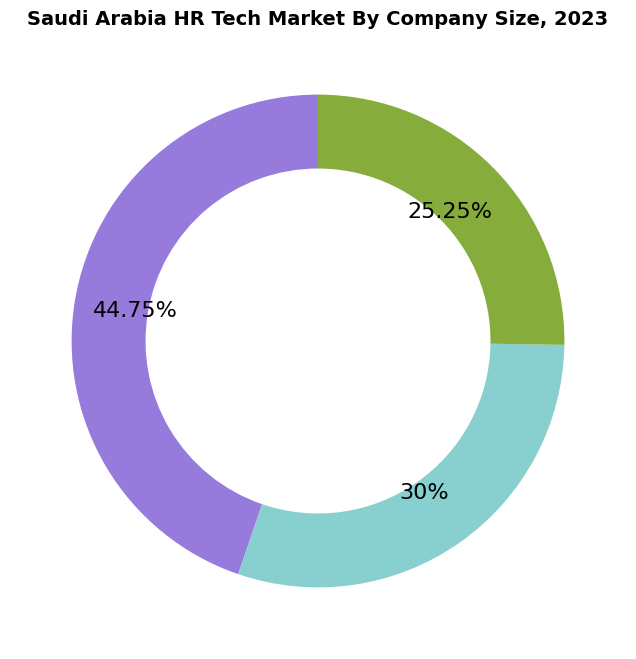

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data (example percentages)
sizes = [44.75, 30, 25.25]  # Replace with your exact values
labels = ['44.75%', '30%', '25.25%']
colors = ['#967ADC', '#88D0CF', '#86AD3C']  # Matching colors from original image

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(sizes, colors=colors, startangle=90, wedgeprops=dict(width=0.3))

# Add percentage labels inside each segment
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.75 * np.cos(np.radians(angle))
    y = 0.75 * np.sin(np.radians(angle))
    ax.text(x, y, labels[i], ha='center', va='center', fontsize=16, color='black')

# Set the title
ax.set_title('Saudi Arabia HR Tech Market By Company Size, 2023', fontsize=14, fontweight='bold')

# Show the chart
plt.show()
